# 1. Framing the problem

### Problem:

#### There is a big demand for organizing themed parties. Quite often, the organizers are asked to theme a party by a decade, so people may feel as though they trully are at a party from the (distant) past. Usually, the organizers are asked to plan a party themed for the 80s or 90s, or something of that sort.

### Scope/Objective:

#### When thinking of party, one of the first things that come to mind is the music. The music decides the mood on the dance floor and infuses the participants' hearts with a joyful rhythm.

#### The organizers want to create playlists with songs that 'feel like a decade', even if they are not.

### (Spoilers!) How the problem will be solved (Spoilers!)

#### The problem shall be solved in a supervised manner. The dataset will undergo needed transformations. From the transformed dataset, a set of features and labels will be selected. Different classification models will be trained to find the best one.
#### The performance of the models will be tested by feeding in different songs, and seeing what decade they predict the song is from. This way, when the organizers have a list of songs they wish to select for a themed party, they can feeed the songs to the model, and see which ones match.

# 2. Getting data

### Data to be used represents a dataset of roughly 30k songs from Spotify. The data contains columns related to songs (names, artists, ids, date of release), but also metadata about the songs. The metadata in this context refers to such columns as 'danceability', 'mode', 'duration', 'energy', 'key', etc.

### Data was downloaded from kaggle:
https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

### The information about the data can be seen in the cell below.

#### It has 32833 rows of data, which should be more than enough for the purpose.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import precision_score

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SMOTENC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn.svm import SVC



from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

data = pd.read_csv('spotify_songs.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [2]:
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 3. Explore the data

### The exploration of data starts below.
#### It can be seen that very few data is missing. There are only 0.014% of missing data in some irrelevant columns, such as 'track_name', 'track_artist' and 'track_album_name'
#### Moreover, some plots can be seen below, which can make the reader more familiar with the data

### A new column is created. The new column is called 'decade' and represents the binning of the 'track_album_release_date' column from the original dataset.

### Heat maps regarding correlation are also presented.

### After the data is divided into features and labels, the features (X) are scaled. The labels (Y) are scaled as well. Scaling helps in model performance quite a lot.

### Percentage of missing values
#### We can see that barely 0.014% of values are missing for some of the columns.

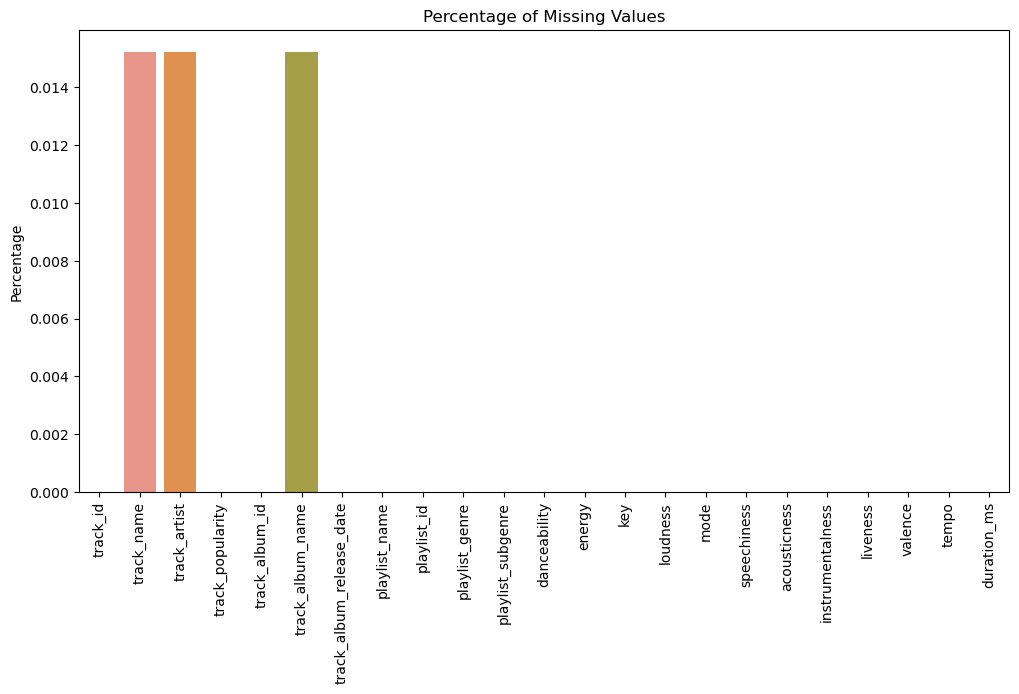

In [15]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store the column names and missing percentages
column_names = []
missing_percentages = []

for column_name, column in data.items():
    column_names.append(column_name)

    # Percentage of missing values
    missing_percentage = (column.isnull().sum() / len(data)) * 100
    missing_percentages.append(missing_percentage)

# Create a bar plot for missing percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=column_names, y=missing_percentages)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values')
plt.ylabel('Percentage')

# Show the plot
plt.show()

### Songs by genre.
#### This information will help us see how the songs are distributed among genres, and if making a multiclass classification makes sense

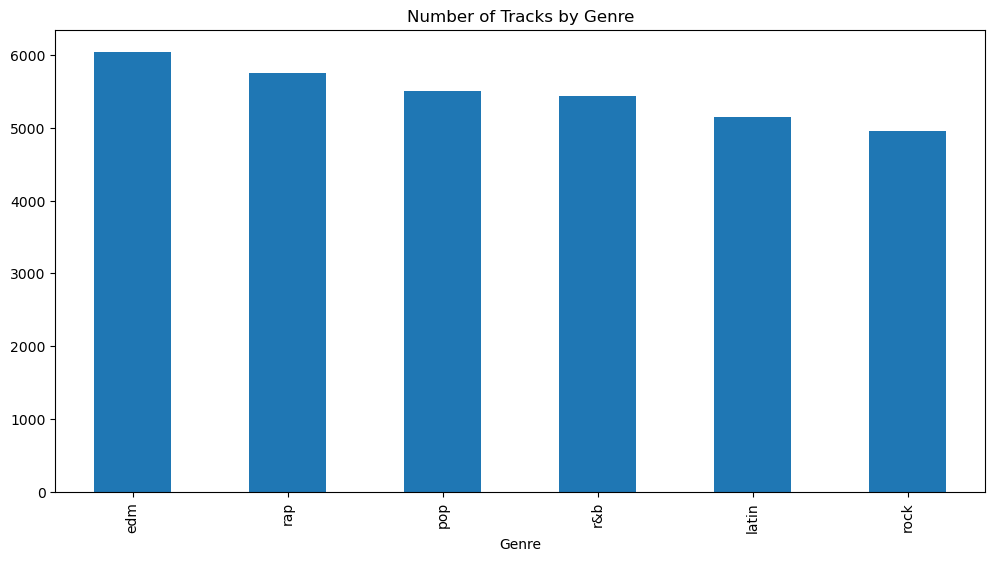

In [31]:
country_counts = data['playlist_genre'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Number of Tracks by Genre')
plt.xlabel('Genre')
# plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Songs by subgenre.
#### This information will help us see how the songs are distributed among subgenres, and if making a multiclass classification makes sense

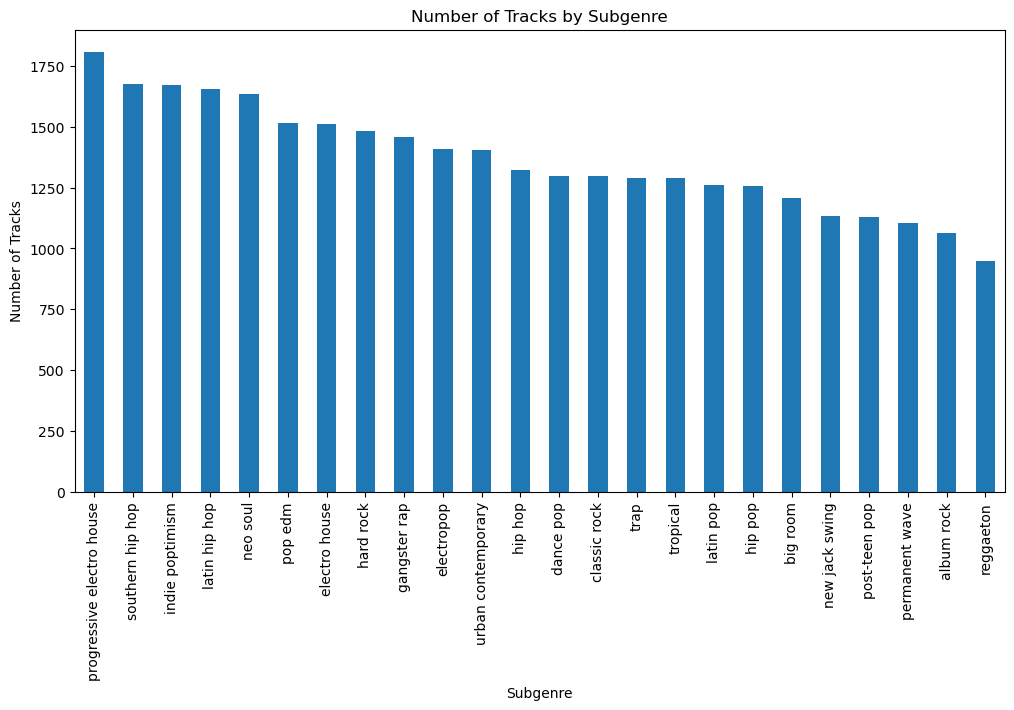

In [5]:
country_counts = data['playlist_subgenre'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Number of Tracks by Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Adding new Feature called 'decade'
#### This feature is a binning of song by decade, starting from the earliest decade found in the dataset

In [6]:
# # earliest_date = data['track_album_release_date'].min() ## checking the earliest date
#
# data['decade'] = data['track_album_release_date'].str[:4].astype(int) // 10 * 10
#
# # Create bins for each decade
# bins = {
#     1950: "50s",
#     1960: "60s",
#     1970: "70s",
#     1980: "80s",
#     1990: "90s",
#     2000: "2000s",
#     2010: "2010s",
#     2020: "2020s"
# }
#
# data['decade'] = data['decade'].map(bins)


### Songs by decade

In [7]:
# country_counts = data['decade'].value_counts()
# plt.figure(figsize=(12, 6))
# country_counts.plot(kind='bar')
# plt.title('Number of Tracks by Decade')
# plt.xlabel('Decade')
# plt.ylabel('Number of Tracks')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()

# Feature Correlation
### Using only numeric features

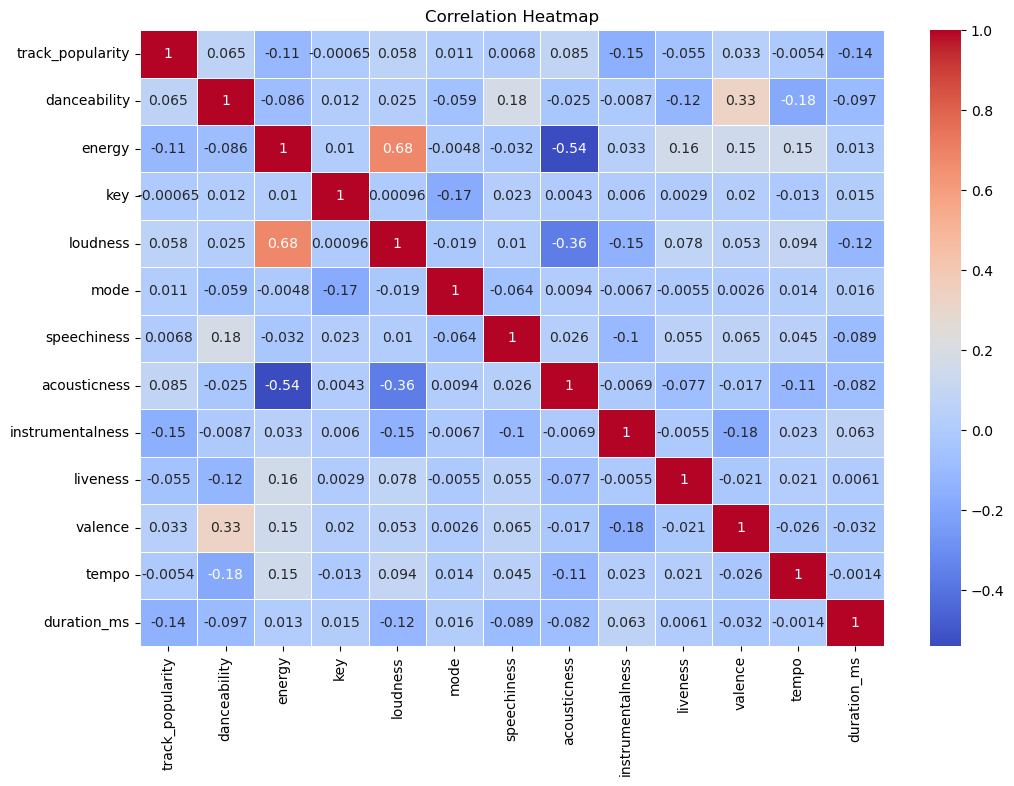

In [32]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### With textual data

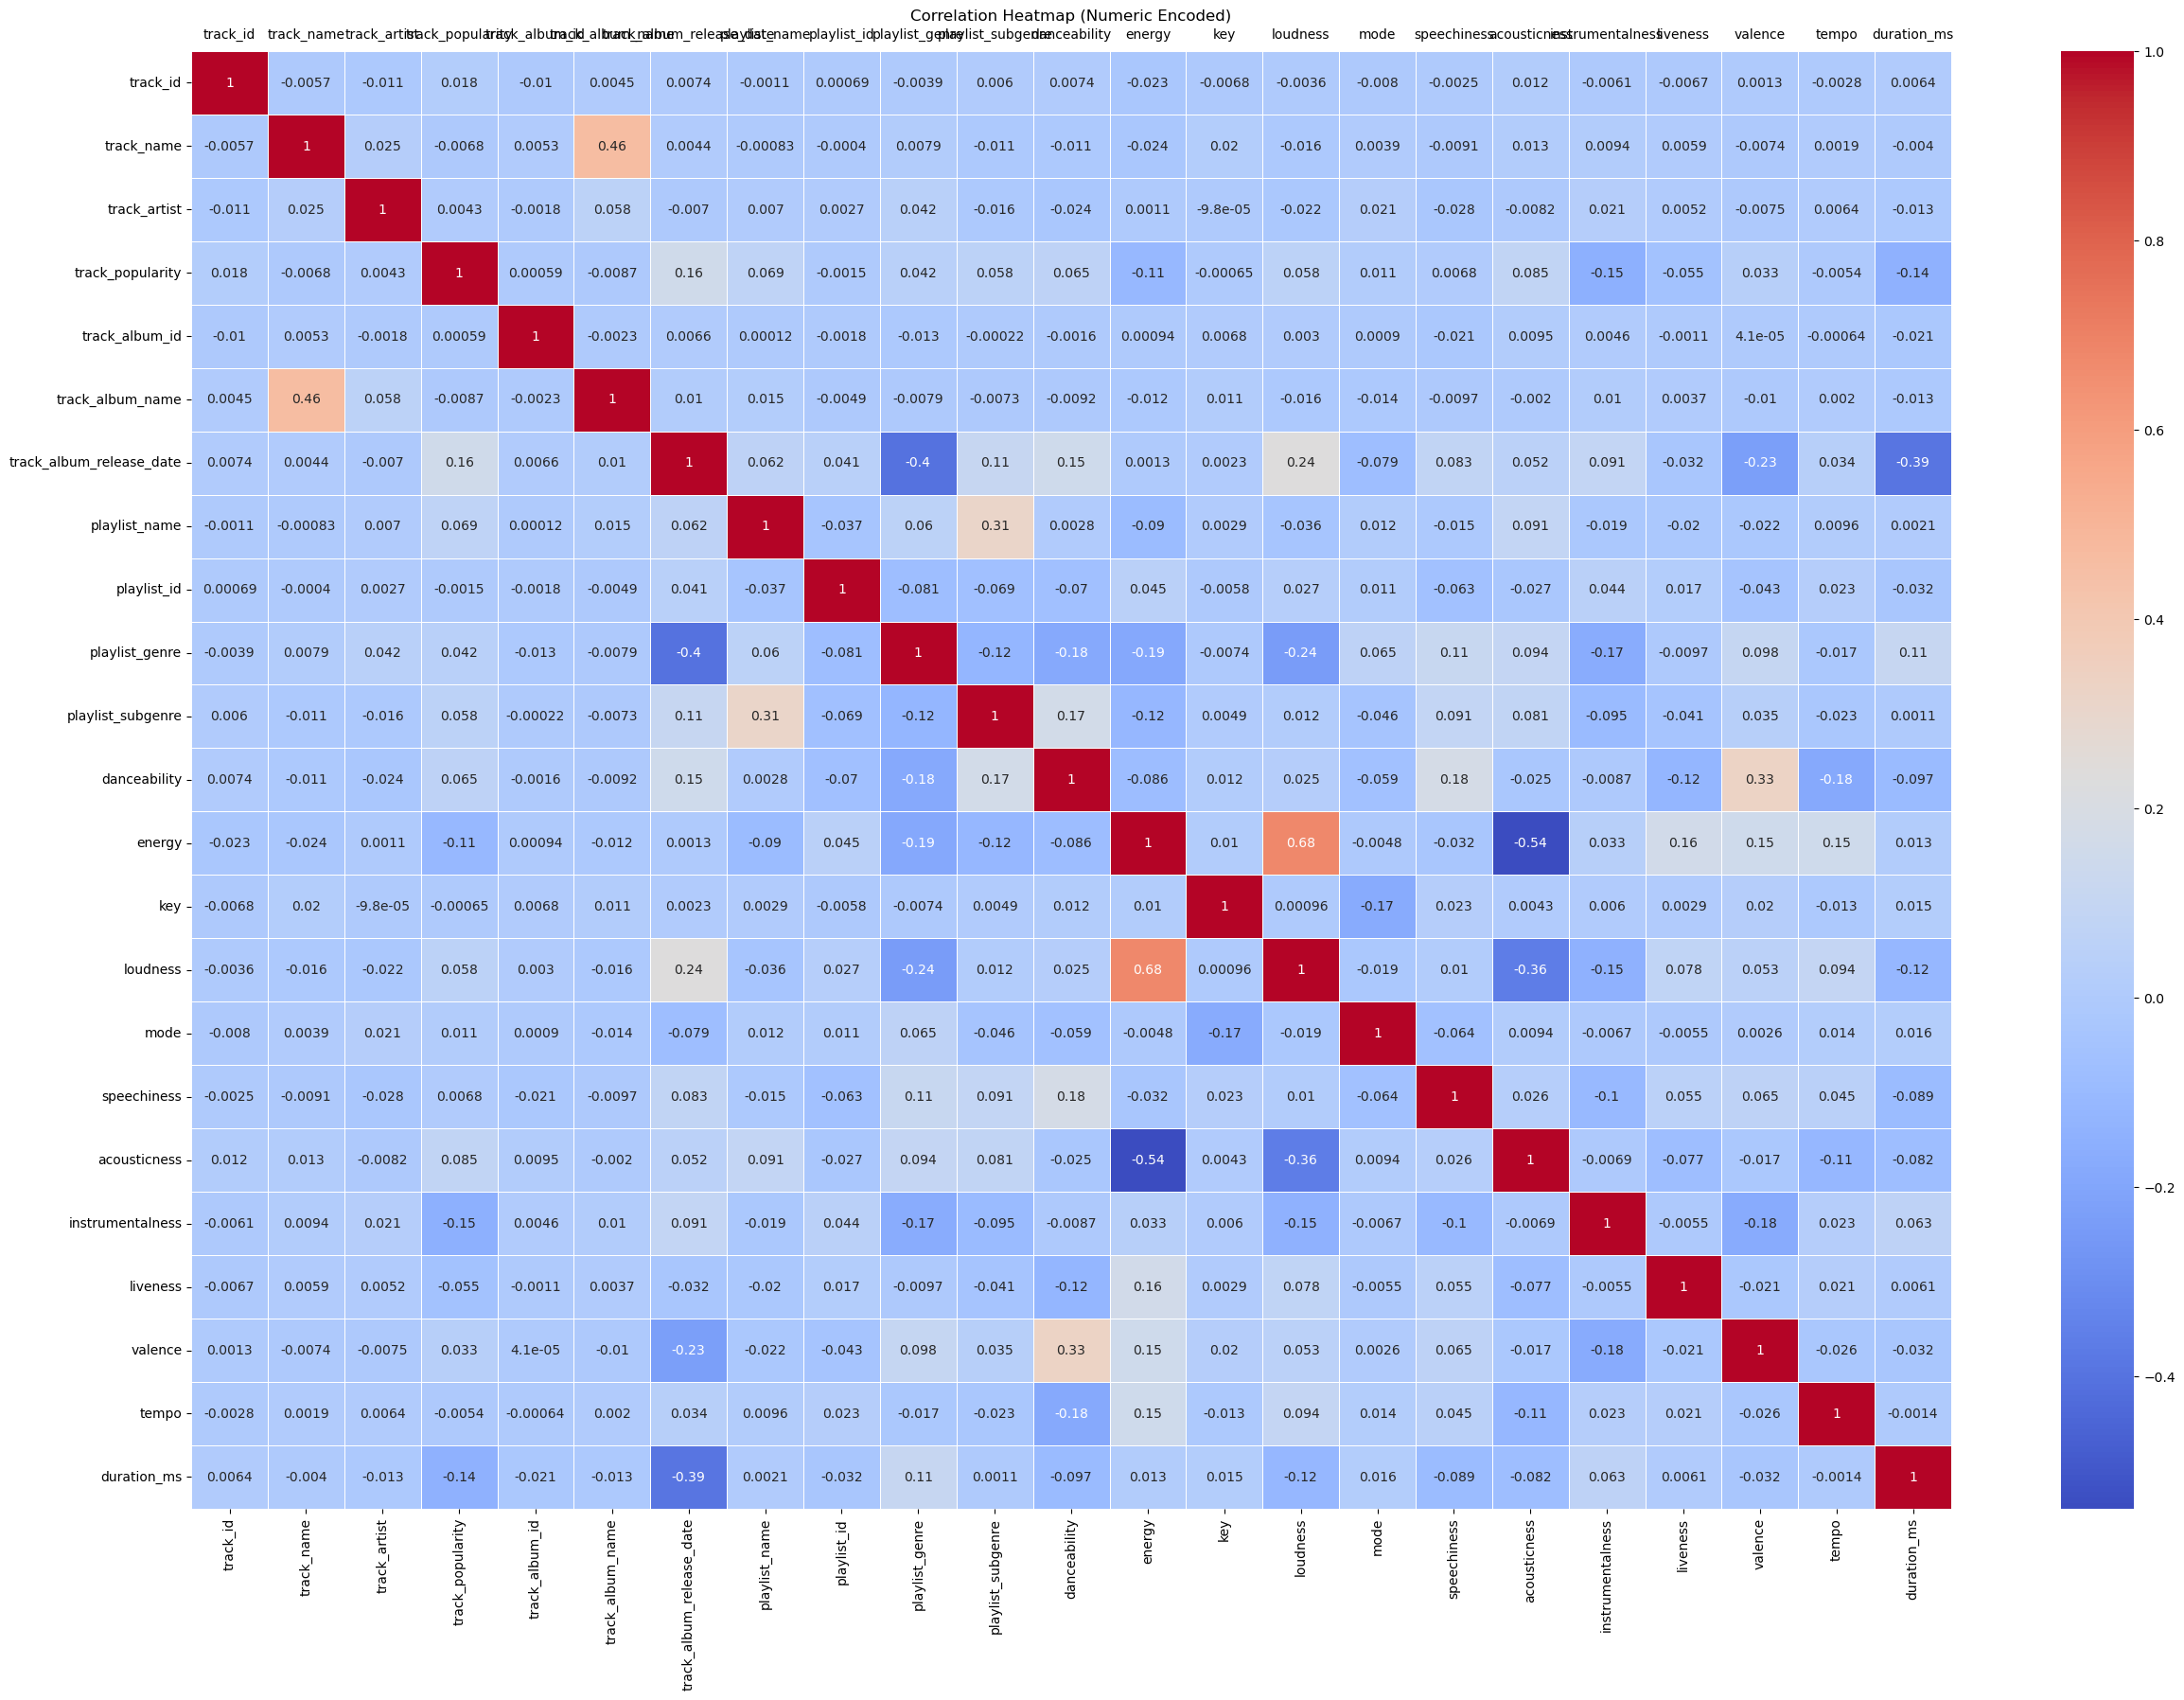

In [33]:
numeric_data = data.copy()

# Initialize LabelEncoder
label_encoder1 = LabelEncoder()

# Iterate over each column to identify non-numeric columns
for column in numeric_data.columns:
    if numeric_data[column].dtype == 'object':
        # Apply label encoding to non-numeric columns
        numeric_data[column] = label_encoder1.fit_transform(numeric_data[column].astype(str))

# Calculate the correlation matrix for the numeric data
correlation_matrix_numeric = numeric_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Encoded)')
# Position x-axis labels at the top
plt.tick_params(axis='x', labeltop=True)
plt.show()


# 4. Preparing data

#### Some columns are dropped, as can be seen below. X and Y (features and labels) are selected.

#### For testing purposes, there are two label datasets. One, that has the labels in one column, and one that one-encodes them into 6 columns. Testing has proven that 1 column works better with classification, and 6 columns work better with neural networks (although no neural networks are presented here)

#### Data is split into training and testing sets. Then the X_train and X_test are scaled.


#### After Y is encoded:


In [10]:
# # Original Values  Encoded Values
#            2010s               1
#            2000s               0
#            2020s               2
#              90s               7
#              80s               6
#              70s               5
#              60s               4
#              50s               3

# Dropping features that are irrelevant from the first look

In [34]:
columns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id',
                   'track_album_name', 'track_album_release_date'
                   ,'playlist_name', 'playlist_id']

relevant_data = data.drop(columns=columns_to_drop)
relevant_data

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


## Transforming non-numeric to numeric

In [35]:
numeric_data = relevant_data.copy()

# Initialize LabelEncoder
label_encoder1 = LabelEncoder()

# Iterate over each column to identify non-numeric columns
for column in numeric_data.columns:
    if numeric_data[column].dtype == 'object':
        # Apply label encoding to non-numeric columns
        numeric_data[column] = label_encoder1.fit_transform(numeric_data[column].astype(str))

numeric_data

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2,3,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,2,3,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,2,3,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,2,3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,2,3,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0,18,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,0,18,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,0,18,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,0,18,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# Selecting features and labels
### X has numeric data about danceability, energy, key, etc.
### Y has the decade column

### Because there are few instances of some classes, it might be a good idea to resample some instances. The way it is doen with RandomOverSampler, is that it will resample the minority classes

In [13]:
# # relevant_data
# numeric_data

In [36]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# X = numeric_data.drop(columns=['track_popularity', 'playlist_subgenre', 'playlist_genre'])
# X = numeric_data[['mode', 'speechiness', 'acousticness', 'valence', 'duration_ms']]
# Y = numeric_data['playlist_genre']

X = numeric_data.drop(columns=['track_popularity'
    ,'playlist_subgenre'
    ,'playlist_genre'
    # ,'decade'
])
# Y = numeric_data['decade']
Y = numeric_data['playlist_genre']



############################################################
oversampler = RandomOverSampler(random_state=42)
# other oversamplers can be used, such as SMOTE, ADASYN, BorderlineSMOTE, SMOTENC

# Resample the dataset to balance the number of instances for each decade
X_resampled, y_resampled = oversampler.fit_resample(X, Y)

X = X_resampled
Y = y_resampled
#################################################
# Y

In [37]:
# # Get unique values before encoding
original_values = relevant_data['playlist_genre'].unique()

# Get unique values after encoding
encoded_values = numeric_data['playlist_genre'].unique()

# Create a DataFrame to display translations (before and after encoding)
translations = pd.DataFrame({'Original Values': original_values, 'Encoded Values': encoded_values})

print(translations)

  Original Values  Encoded Values
0             pop               2
1             rap               4
2            rock               5
3           latin               1
4             r&b               3
5             edm               0


### Y will stay as 1 columns. This should be done if numeric_data is used for X and Y, and not relevant_data(which still has text columns)

In [ ]:

# from sklearn.preprocessing import LabelEncoder
#
# # Assuming Y is a Series containing strings representing categories
# label_encoder2 = LabelEncoder()
# Y_one_column = label_encoder2.fit_transform(Y)
# Y_one_column
#
#
# y_decoded =label_encoder2.inverse_transform(Y_one_column)
# y_decoded


### Transformig the two Ys into dataframes. Scaling X

In [38]:
Y_one_column = pd.DataFrame(Y)


In [42]:
X_train, X_test, label_train, label_test = train_test_split(X, Y_one_column, test_size=0.2,random_state=50)
print("Number of data points in training set and test set, respectively: {} and {}".format(X_train.shape[0],
                                                                                          X_test.shape[0]))
# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler()
# X_test



Number of data points in training set and test set, respectively: 29006 and 7252


In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 5. Short-list promising models

#### Notice that after oversampling, the previously underperforming classes started performing much better

#### All models have trouble predicting songs in the 50s, as there is little data from that decade.

#### Feature selection using sklearn doesn't help much with the accuracy. In fact, if we use a dataset with selected features, the accuracy drops.

## The accuracies from below are from the models before the oversampling technique was applied!
#### The actual performance can be found in step 6, or by looking at how the models have performed below.

## KNN:
#### Accuracy: 71.5% - 72.5%
#### Most significant variables: n_neighbours, metric
#### Errors: lwo precision and recall on most classes. The high precision of the model is due to class 1. Even so, the model performs quire accurately when testing with random songs.


## NB:
#### Accuracy: 69.8%
#### Most significant variables:
#### Errors: Performs very badly. High precision is due to predicting class 1, while all other classes have very low prediction and very low recall. This means that NB can only predict one class.



## Logistic regression:
#### Accuracy: 72%
#### Most significant variables: solver, penalty, c
#### Errors: Just like NB, low precision and recall on most classes. High accuracy is due to class 1, and maybe a bit other classes.

## Decision Trees:
#### Accuracy: 71.2%
#### Most significant variables: max_depth, min_samples_split, min_samples_leaf, criterion
#### Errors: Again the same problem of low precision and recall on some classes. This is due to missing data most likely


## Random Forest:
#### Accuracy: 79.2%
#### Most significant variables: n_estimators, max_features
#### Errors: Surprisingly, the precision and recall increase dramatically when compared to other models. even though they are not perfect, the classification is done much better.

## Support Vector machines:
#### Accuracy: 74.4%
#### Most significant variables: kernel, c
#### Just like Random Forests, the precision and recall are much better than the rest of the models. Class 3 (50s) is very badly predicted, because there is little data about those songs.


## In conclusion, it can be seen that one of the biggest issues (with most of the models) is that data is missing. It is hard for the model to classify all songs, because for example there are many more songs from 2010s than from 50s in the dataset.

# KNN

In [ ]:
for x in range (1,15):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, label_train)
    print(x , ":")
    print("Model accuracy on the original data: {}".format(knn.score(X_test,label_test)))


In [47]:
label_train

,playlist_genre
9634,4
35477,5
3753,2
35902,5
99,2
...,...
8559,4
34887,4
32022,0
22637,3


,playlist_genre
34215,2
17490,1
31944,0
32571,0
6846,4
...,...
35279,5
26787,3
13781,5
35247,5


In [43]:
knn_test = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
# {'manhattan', 'minkowski', 'sqeuclidean', 'dice', 'p', 'chebyshev', 'l2', 'hamming', 'jaccard', 'euclidean', 'l1', 'kulsinski', 'haversine', 'nan_euclidean', 'cosine', 'russellrao', 'braycurtis', 'seuclidean', 'rogerstanimoto', 'wminkowski', 'canberra', 'precomputed', 'matching', 'infinity', 'pyfunc', 'cityblock', 'sokalmichener', 'mahalanobis', 'sokalsneath', 'correlation', 'yule'}
#neighbours between 1 and 21
# metric in [‘euclidean’, ‘manhattan’, ‘minkowski’]
##minkowski or manhattan metric seems to output the best accuracy, but not by much
knn_test.fit(X_train, label_train)


predictions = knn_test.predict(X_test)

accuracy = accuracy_score(label_test, predictions)
classification_rep = classification_report(label_test, predictions)
conf_matrix = confusion_matrix(label_test, predictions)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print(conf_matrix)


print("Model accuracy on the original data: {}".format(knn_test.score(X_test,label_test)))

C:\Users\asold\Documents\VIA\7thSemester\MAL\notebooks\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.31425813568670713
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.53      0.36      1166
           1       0.31      0.41      0.36      1230
           2       0.25      0.22      0.23      1231
           3       0.34      0.22      0.27      1238
           4       0.36      0.20      0.26      1221
           5       0.43      0.32      0.37      1166

    accuracy                           0.31      7252
   macro avg       0.33      0.32      0.31      7252
weighted avg       0.33      0.31      0.31      7252

[[613 149 169  73  79  83]
 [303 509 148 105  93  72]
 [400 276 271 109  68 107]
 [288 266 204 272 111  97]
 [313 258 153 130 246 121]
 [290 161 157 109  81 368]]
Model accuracy on the original data: 0.31425813568670713


### Checking for over-under fitting, Overftting a bit

In [44]:
train_predictions = knn_test.predict(X_train)

# Evaluate precision on the training set
train_precision = precision_score(label_train, train_predictions, average='weighted')

# Evaluate precision on the test set
test_precision = precision_score(label_test, predictions, average='weighted')

# Print the precision on train and test data
print("Precision on Train Data:", train_precision)
print("Precision on Test Data:", test_precision)

Precision on Train Data: 0.6413753720648312
Precision on Test Data: 0.3287751065194006


## Making Predictions

In [45]:
random_song = np.array([0.677,	0.83,	11,	-8.147,	0,	0.0389,	0.295,	1.04e-5,	0.0295,	0.705,	114.921,	236787
])
random_song = random_song.reshape(1,-1)
random_song_scaled = scaler.transform(random_song)
prediction = knn_test.predict(random_song_scaled)
predicted_label = label_encoder1.inverse_transform(prediction)
predicted_label
# prediction

C:\Users\asold\Documents\VIA\7thSemester\MAL\notebooks\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asold\Documents\VIA\7thSemester\MAL\notebooks\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['album rock'], dtype=object)

# Naive Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB

Y_bayes = Y_one_column
X_train_bayes, X_test_bayes, label_train_bayes, label_test_bayes = train_test_split(X, Y_bayes, test_size=0.2,random_state=50)


nb = GaussianNB()
nb.fit(X_train_bayes, label_train_bayes)

predictions = nb.predict(X_test_bayes)

accuracy = accuracy_score(label_test_bayes, predictions)
classification_rep = classification_report(label_test_bayes, predictions)
conf_matrix = confusion_matrix(label_test_bayes, predictions)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print(conf_matrix)

print("Model accuracy on the original data: {}".format(nb.score(X_test_bayes,label_test_bayes)))


### Checking for over-under fitting. Poor performance

In [ ]:
train_predictions = nb.predict(X_train_bayes)

# Evaluate precision on the training set
train_precision = precision_score(label_train_bayes, train_predictions, average='weighted')

# Evaluate precision on the test set
test_precision = precision_score(label_test_bayes, predictions, average='weighted')

# Print the precision on train and test data
print("Precision on Train Data:", train_precision)
print("Precision on Test Data:", test_precision)

## Trying out Polynomials. The performance isn't improved that much

In [ ]:
# # X_train, X_test, label_train, label_test = train_test_split(X, Y_one_column, test_size=0.2,random_state=50)
# print("Number of data points in training set and test set, respectively: {} and {}".format(X_train.shape[0],
#                                                                                           X_test.shape[0]))
# # from sklearn.preprocessing import MinMaxScaler
# #
# # scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# # # X_train, X_test, label_train, label_test = train_test_split(features, target, random_state=50)
# X_poly = X
#
# poly = PolynomialFeatures(degree=5)
# poly.fit(X_poly)
# X_poly = poly.transform(X_poly)
#
# y_values = Y_one_column.values
#
# X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_values)
# # tree = DecisionTreeClassifier()
# # tree.fit(X_train_poly, y_train)
# ### DecissionTrees have accuracy on train of 1, and test of about 0.73
#


In [ ]:
# # knn = KNeighborsClassifier(n_neighbors=13, metric='manhattan')
# knn.fit(X_train_poly, y_train)
#
# print("Accuracy on training data = {}".format(knn.score(X_train_poly, y_train)))
# print("Accuracy on testing data = {}\n".format(knn.score(X_test_poly, y_test)))

### Feature Selection using sklearn. But selection doesn't change much

In [ ]:
# select = SelectPercentile(percentile=70) # 70% of the features will be chosen
# select.fit(X_train, label_train)
#
# X_train_selected = select.transform(X_train)
# X_test_selected = select.transform(X_test)
#
#
# print("The shape of X_train with all interaction features: {}".format(X_train.shape))
# print("The shape of X_train after selected 70% of features: {}".format(X_train_selected.shape))

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
# knn.fit(X_train_selected, label_train)
# print("Accuracy on training data = {}".format(knn.score(X_train_selected, label_train)))
# print("Accuracy on testing data = {}\n".format(knn.score(X_test_selected, label_test)))

### Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression(solver='sag', penalty='none', C=0.1)
#lbfgs is faster than newton

## None of the hyperparameters really change the accuracy

# solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
# penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
# C in [100, 10, 1.0, 0.1, 0.01]

logistic_regression_model.fit(X_train,label_train )
predictions = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(label_test, predictions)
classification_rep = classification_report(label_test, predictions)
conf_matrix = confusion_matrix(label_test, predictions)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print(conf_matrix)


### Checking for over-under fitting. Underfitting by a lot

In [ ]:
train_predictions = logistic_regression_model.predict(X_train)

# Evaluate precision on the training set
train_precision = precision_score(label_train, train_predictions, average='weighted')

# Evaluate precision on the test set
test_precision = precision_score(label_test, predictions, average='weighted')

# Print the precision on train and test data
print("Precision on Train Data:", train_precision)
print("Precision on Test Data:", test_precision)

### Decision Trees

In [48]:
decision_tree_model = DecisionTreeClassifier(max_depth=19,min_samples_split=9,
                                             min_samples_leaf=3
                                             # ,max_features='log2'
                                             ,random_state=42,
                                             criterion='entropy',
                                             )
# he 'criterion' parameter of DecisionTreeClassifier must be a str among {'log_loss', 'entropy', 'gini'}

dtc = decision_tree_model.fit(X_train, label_train)

# Make predictions on the test set
predictions = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(label_test, predictions)
classification_rep = classification_report(label_test, predictions)
conf_matrix = confusion_matrix(label_test, predictions)


# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

# Print the decision tree rules
tree_rules = export_text(decision_tree_model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Accuracy: 0.4891064533921677
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      1166
           1       0.43      0.49      0.46      1230
           2       0.35      0.36      0.35      1231
           3       0.46      0.42      0.44      1238
           4       0.54      0.47      0.50      1221
           5       0.66      0.66      0.66      1166

    accuracy                           0.49      7252
   macro avg       0.49      0.49      0.49      7252
weighted avg       0.49      0.49      0.49      7252

Decision Tree Rules:
|--- speechiness <= 0.13
|   |--- danceability <= 0.63
|   |   |--- energy <= 0.69
|   |   |   |--- speechiness <= 0.04
|   |   |   |   |--- duration_ms <= 247633.50
|   |   |   |   |   |--- loudness <= -9.55
|   |   |   |   |   |   |--- acousticness <= 0.47
|   |   |   |   |   |   |   |--- valence <= 0.27
|   |   |   |   |   |   |   |   |--- loudness <= -10.52
|   |   |   |   |   

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(35,35))
dt_plot = tree.plot_tree(dtc,
                   feature_names=X.columns,
                   filled=True, fontsize=13,precision=0)
plt.savefig('tree_plot',dpi=100)

### Checking for over-under fitting. The model is underfitting a lot.

In [49]:
train_predictions = decision_tree_model.predict(X_train)

# Evaluate precision on the training set
train_precision = precision_score(label_train, train_predictions, average='weighted')

# Evaluate precision on the test set
test_precision = precision_score(label_test, predictions, average='weighted')

# Print the precision on train and test data
print("Precision on Train Data:", train_precision)
print("Precision on Test Data:", test_precision)

Precision on Train Data: 0.7940312775236056
Precision on Test Data: 0.4921752393270674


### Random Forest

In [50]:
random_forest_model = RandomForestClassifier(n_estimators=21, random_state=42
                                             # ,max_features=12 ## gives 0.8 accuracy
                                             , max_features='sqrt'## sqrt or log2 give same accuracy
                                             )
### 21 n_estimators gives best accuracy
random_forest_model.fit(X_train, label_train)

# Make predictions on the test set
predictions = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(label_test, predictions)
classification_rep = classification_report(label_test, predictions)
conf_matrix = confusion_matrix(label_test, predictions)


# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


C:\Users\asold\AppData\Local\Temp\ipykernel_31736\671235297.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, label_train)


Accuracy: 0.5808052950910094
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1166
           1       0.55      0.52      0.53      1230
           2       0.45      0.41      0.43      1231
           3       0.53      0.51      0.52      1238
           4       0.59      0.63      0.61      1221
           5       0.71      0.79      0.75      1166

    accuracy                           0.58      7252
   macro avg       0.58      0.58      0.58      7252
weighted avg       0.58      0.58      0.58      7252

Confusion Matrix:
[[744  76 173  62  71  40]
 [108 640 159 131 159  33]
 [192 163 505 133  75 163]
 [ 38 122 136 631 214  97]
 [ 60 134  62 155 772  38]
 [ 18  35  98  82  13 920]]


### Checking for over-under fitting. This model is slightly overfitting

In [51]:
train_predictions = random_forest_model.predict(X_train)

# Evaluate precision on the training set
train_precision = precision_score(label_train, train_predictions, average='weighted')

# Evaluate precision on the test set
test_precision = precision_score(label_test, predictions, average='weighted')

# Print the precision on train and test data
print("Precision on Train Data:", train_precision)
print("Precision on Test Data:", test_precision)


Precision on Train Data: 0.9402413901422486
Precision on Test Data: 0.57603225917428


#### Predictions on Random Forest

In [ ]:
relevant_data

In [52]:
random_song = np.array([0.564,    0.932,    11,    -10.068,    1,    0.0554,    0.013,    0.169,    0.349,    0.619,    112.937,    146250])
random_song = random_song.reshape(1,-1)
random_song_scaled = scaler.transform(random_song)
prediction = random_forest_model.predict(random_song_scaled)
predicted_label = label_encoder1.inverse_transform(prediction)
predicted_label

C:\Users\asold\Documents\VIA\7thSemester\MAL\notebooks\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\asold\Documents\VIA\7thSemester\MAL\notebooks\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['electropop'], dtype=object)

### Support Vector Machines

In [ ]:
svm_model = SVC(kernel='rbf', C=1, random_state=42)
## the higher the C parameter is, the higher is the penalty for missclassification. If C is lower, then misclassification is allowed more.
## poly works better than others
## sigmoid performs worst

# The 'kernel' parameter of SVC must be a str among {'linear', 'poly', 'sigmoid', 'rbf', 'precomputed'}
svm_model.fit(X_train, label_train)

# Make predictions on the test set
predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(label_test, predictions)
conf_matrix = confusion_matrix(label_test, predictions)
classification_rep = classification_report(label_test, predictions)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

### Checking for over/under fitting

In [ ]:
train_predictions = svm_model.predict(X_train)

# Evaluate precision on the training set
train_precision = precision_score(label_train, train_predictions, average='weighted')

# Evaluate precision on the test set
test_precision = precision_score(label_test, predictions, average='weighted')

# Print the precision on train and test data
print("Precision on Train Data:", train_precision)
print("Precision on Test Data:", test_precision)

# 6. Fine-tuning the system.

#### The main technique to fine-tune the system was to resample for minor classes. This actually brought major changes to the performance of most models

## KNN:
#### New Accuracy: 96%

## NB:
#### New Accuracy: 38%

## Logistic regression:
#### New Accuracy : 47%

## Decision Trees:
#### New Accuracy: 52%


## Random Forest:
#### New Accuracy: 99%

## Support Vector machines:
#### New Accuracy: 85%

#### In conclusion, we can see that the resampling technique improves the performance of the models that actually matter, and which could be used by the customer.